# "惠聚"电商平台用户行为分析及品类优化策略研究

### 项目概述

本报告基于"惠聚"电商平台2022年的用户交易数据，旨在深入分析用户行为模式、品类销售表现，并为平台的品类战略和用户运营提供数据驱动的决策支持。

## 1. 环境配置与数据加载

### 1.1 分析环境设置

为确保分析的顺利进行，我们首先导入必要的数据分析库，并配置适合中文显示的图表环境。

**主要工具库：**
- pandas: 数据处理与分析
- numpy: 数值计算
- matplotlib/seaborn: 数据可视化
- warnings: 警告控制

In [13]:
# 重新导入必要的数据分析库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 设置图表样式
sns.set_style("whitegrid")
sns.set_palette("husl")

# 设置显示选项
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
warnings.filterwarnings('ignore')

# 显示环境信息
print("=== 惠聚电商平台数据分析项目===")
print(f"📅 分析日期: {datetime.now().strftime('%Y-%m-%d %H:%M')}")
print(f"🔄 使用合理化数据")
print(f"🐍 Python 环境:")
print(f"   • Pandas: {pd.__version__}")
print(f"   • NumPy: {np.__version__}")
print(f"   • Matplotlib: {plt.matplotlib.__version__}")
print(f"   • Seaborn: {sns.__version__}")
print("=" * 60)

=== 惠聚电商平台数据分析项目===
📅 分析日期: 2025-05-29 17:44
🔄 使用合理化数据
🐍 Python 环境:
   • Pandas: 2.2.3
   • NumPy: 2.2.6
   • Matplotlib: 3.10.3
   • Seaborn: 0.13.2


### 1.2 加载数据

加载"惠聚"平台交易数据。

**数据特点：**
- 数据规模：55万+交易记录
- 客单价水平：约92元
- 时间范围：2022年全年
- 数据质量：完整无缺失

In [14]:
# 加载数据集
print("📂 加载惠聚平台交易数据...")
try:
    df = pd.read_csv('../data/huiju_sales_data_2022_processed.csv')
    print(f"✅ 数据加载成功！")
    print(f"📊 数据集规模: {df.shape[0]:,} 条交易记录, {df.shape[1]} 个字段")
    print(f"💾 数据大小: {df.memory_usage().sum() / 1024**2:.2f} MB")
    
    # 快速验证数据调整效果
    print(f"\n🔍 数据验证:")
    print(f"   • 平均客单价: {df['Purchase'].mean():.2f} 元")
    print(f"   • 客单价中位数: {df['Purchase'].median():.2f} 元")
    print(f"   • 价格区间: {df['Purchase'].min():.2f} - {df['Purchase'].max():.2f} 元")
    print(f"   • 总GMV: {df['Purchase'].sum()/10000:.2f} 万元")
    
except FileNotFoundError:
    print("❌ 调整后的数据文件未找到，请检查预处理是否完成")
except Exception as e:
    print(f"❌ 数据加载失败: {e}")

print("\n" + "="*60)

📂 加载惠聚平台交易数据...
✅ 数据加载成功！
📊 数据集规模: 550,068 条交易记录, 10 个字段
💾 数据大小: 41.97 MB

🔍 数据验证:
   • 平均客单价: 92.64 元
   • 客单价中位数: 80.47 元
   • 价格区间: 0.12 - 239.61 元
   • 总GMV: 5095.81 万元



## 2. 数据探索与质量评估

### 2.1 数据结构重新审视

基于调整后的数据，重新审视数据结构和字段含义，确保分析基础的准确性。

**业务字段解释：**
- `User_ID`: 用户唯一标识
- `Product_ID`: 商品唯一标识  
- `Gender`: 用户性别
- `Age`: 用户年龄段
- `Occupation`: 用户职业（编码）
- `City_Category`: 城市等级（A/B/C）
- `Stay_In_Current_City_Years`: 居住年限
- `Marital_Status`: 婚姻状况
- `Product_Category`: 商品品类
- `Purchase`: 购买金额（已调整）

In [15]:
# 数据结构基本信息
print("📋 数据集结构信息：")
print(f"数据维度: {df.shape}")
df.info()

print("\n👀 数据样本预览:")
display(df.head())

print("\n📊 各字段唯一值统计:")
for col in df.columns:
    unique_count = df[col].nunique()
    if col == 'Purchase':
        print(f"{col:25s}: {unique_count:6,} 个唯一值")
    else:
        print(f"{col:25s}: {unique_count:6,} 个唯一值")

📋 数据集结构信息：
数据维度: (550068, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category            550068 non-null  int64  
 9   Purchase                    550068 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 42.0+ MB

👀 数据样本预览:


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,83.70
1,1000001,P00248942,F,0-17,10,A,2,0,1,152.00
2,1000001,P00087842,F,0-17,10,A,2,0,12,14.22
3,1000001,P00085442,F,0-17,10,A,2,0,12,10.57
4,1000002,P00285442,M,55+,16,C,4+,0,8,79.69



📊 各字段唯一值统计:
User_ID                  :  5,891 个唯一值
Product_ID               :  3,631 个唯一值
Gender                   :      2 个唯一值
Age                      :      7 个唯一值
Occupation               :     21 个唯一值
City_Category            :      3 个唯一值
Stay_In_Current_City_Years:      5 个唯一值
Marital_Status           :      2 个唯一值
Product_Category         :     20 个唯一值
Purchase                 : 18,105 个唯一值


### 2.2 数据质量检查与分布分析

对各个字段进行详细分析，了解用户构成、消费模式和商品分布特征。

**分析重点：**
1. 用户人口统计学特征分布
2. 购买金额分布特征和异常值检测
3. 商品品类和城市分布情况
4. 数据质量评估

In [16]:
# 检查分类字段的详细分布
print("🔍 用户人口统计学特征分析:")
print("\n1. 性别分布:")
gender_dist = df['Gender'].value_counts()
print(gender_dist)
print(f"   男女比例: {df['Gender'].value_counts(normalize=True).round(3).to_dict()}")

print("\n2. 年龄段分布:")
age_dist = df['Age'].value_counts().sort_index()
print(age_dist)
age_pct = df['Age'].value_counts(normalize=True).round(3).sort_index()
for age, pct in age_pct.items():
    print(f"   {age}: {pct*100:.1f}%")

print("\n3. 城市等级分布:")
city_dist = df['City_Category'].value_counts()
for city, count in city_dist.items():
    pct = count / len(df) * 100
    print(f"   {city}类城市: {count:,} ({pct:.1f}%)")

print("\n4. 婚姻状况分布:")
marital_dist = df['Marital_Status'].value_counts()
marital_labels = {0: '未婚', 1: '已婚'}
for status, count in marital_dist.items():
    pct = count / len(df) * 100
    print(f"   {marital_labels[status]}: {count:,} ({pct:.1f}%)")

print("\n5. 居住年限分布:")
stay_dist = df['Stay_In_Current_City_Years'].value_counts().sort_index()
for years, count in stay_dist.items():
    pct = count / len(df) * 100
    print(f"   {years}年: {count:,} ({pct:.1f}%)")

🔍 用户人口统计学特征分析:

1. 性别分布:
Gender
M    414259
F    135809
Name: count, dtype: int64
   男女比例: {'M': 0.753, 'F': 0.247}

2. 年龄段分布:
Age
0-17      15102
18-25     99660
26-35    219587
36-45    110013
46-50     45701
51-55     38501
55+       21504
Name: count, dtype: int64
   0-17: 2.7%
   18-25: 18.1%
   26-35: 39.9%
   36-45: 20.0%
   46-50: 8.3%
   51-55: 7.0%
   55+: 3.9%

3. 城市等级分布:
   B类城市: 231,173 (42.0%)
   C类城市: 171,175 (31.1%)
   A类城市: 147,720 (26.9%)

4. 婚姻状况分布:
   未婚: 324,731 (59.0%)
   已婚: 225,337 (41.0%)

5. 居住年限分布:
   0年: 74,398 (13.5%)
   1年: 193,821 (35.2%)
   2年: 101,838 (18.5%)
   3年: 95,285 (17.3%)
   4+年: 84,726 (15.4%)


In [17]:
# 购买金额详细分析
print("💰 购买金额分布分析:")
purchase_stats = df['Purchase'].describe()
print(purchase_stats)

print(f"\n📊 关键财务指标:")
print(f"   • 总GMV: {df['Purchase'].sum():,.2f} 元 ({df['Purchase'].sum()/10000:.2f} 万元)")
print(f"   • 平均客单价: {df['Purchase'].mean():.2f} 元")
print(f"   • 客单价中位数: {df['Purchase'].median():.2f} 元")
print(f"   • 客单价标准差: {df['Purchase'].std():.2f} 元")
print(f"   • 变异系数: {df['Purchase'].std()/df['Purchase'].mean():.3f}")

# 异常值检测
q1 = df['Purchase'].quantile(0.25)
q3 = df['Purchase'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"\n🔍 价格分布异常值检测:")
print(f"   • Q1 (25%分位): {q1:.2f} 元")
print(f"   • Q3 (75%分位): {q3:.2f} 元")
print(f"   • IQR: {iqr:.2f} 元")
print(f"   • 异常值上界: {upper_bound:.2f} 元")

outliers = df[df['Purchase'] > upper_bound]
print(f"   • 高价异常值: {len(outliers):,} 笔 ({len(outliers)/len(df)*100:.2f}%)")

# 价格区间分布
print(f"\n💎 价格区间分布:")
bins = [0, 20, 50, 100, 150, 200, 250]
labels = ['0-20元', '20-50元', '50-100元', '100-150元', '150-200元', '200元以上']
price_ranges = pd.cut(df['Purchase'], bins=bins, labels=labels, include_lowest=True)
range_dist = price_ranges.value_counts()
for range_label, count in range_dist.items():
    pct = count / len(df) * 100
    print(f"   {range_label}: {count:,} 笔 ({pct:.1f}%)")

💰 购买金额分布分析:
count    550068.000000
mean         92.639687
std          50.230654
min           0.120000
25%          58.230000
50%          80.470000
75%         120.540000
max         239.610000
Name: Purchase, dtype: float64

📊 关键财务指标:
   • 总GMV: 50,958,127.42 元 (5095.81 万元)
   • 平均客单价: 92.64 元
   • 客单价中位数: 80.47 元
   • 客单价标准差: 50.23 元
   • 变异系数: 0.542

🔍 价格分布异常值检测:
   • Q1 (25%分位): 58.23 元
   • Q3 (75%分位): 120.54 元
   • IQR: 62.31 元
   • 异常值上界: 214.01 元
   • 高价异常值: 2,677 笔 (0.49%)

💎 价格区间分布:
   50-100元: 265,695 笔 (48.3%)
   150-200元: 97,832 笔 (17.8%)
   100-150元: 78,927 笔 (14.3%)
   20-50元: 66,897 笔 (12.2%)
   0-20元: 28,026 笔 (5.1%)
   200元以上: 12,691 笔 (2.3%)


### 2.3 用户行为模式初步分析

分析用户的购买行为特征，识别不同用户群体的消费模式。

**关键指标：**
- 用户购买频次分布
- 用户消费能力分层
- 高价值用户识别
- 用户活跃度评估

In [18]:
# 用户行为统计分析
print("🛒 用户行为模式分析:")

# 计算用户级统计指标
user_stats = df.groupby('User_ID').agg({
    'Purchase': ['count', 'sum', 'mean'],
    'Product_ID': 'nunique',
    'Product_Category': 'nunique'
}).round(2)

user_stats.columns = ['购买次数', '总消费金额', '平均客单价', '购买商品数', '涉及品类数']

print(f"📊 平台用户行为概览:")
print(f"   • 总用户数: {len(user_stats):,} 人")
print(f"   • 平均购买次数: {user_stats['购买次数'].mean():.1f} 次/人")
print(f"   • 平均用户价值: {user_stats['总消费金额'].mean():.2f} 元/人")
print(f"   • 平均客单价: {user_stats['平均客单价'].mean():.2f} 元")

print(f"\n👑 高价值用户分析:")
# 按总消费金额分层
high_value_threshold = user_stats['总消费金额'].quantile(0.8)
medium_value_threshold = user_stats['总消费金额'].quantile(0.5)

high_value_users = user_stats[user_stats['总消费金额'] >= high_value_threshold]
medium_value_users = user_stats[(user_stats['总消费金额'] >= medium_value_threshold) & 
                                (user_stats['总消费金额'] < high_value_threshold)]
low_value_users = user_stats[user_stats['总消费金额'] < medium_value_threshold]

print(f"   • 高价值用户 (Top 20%): {len(high_value_users):,} 人")
print(f"     - 平均消费: {high_value_users['总消费金额'].mean():.2f} 元")
print(f"     - 贡献GMV: {high_value_users['总消费金额'].sum()/df['Purchase'].sum()*100:.1f}%")
print(f"   • 中价值用户 (20%-50%): {len(medium_value_users):,} 人")
print(f"     - 平均消费: {medium_value_users['总消费金额'].mean():.2f} 元")
print(f"   • 低价值用户 (Bottom 50%): {len(low_value_users):,} 人")
print(f"     - 平均消费: {low_value_users['总消费金额'].mean():.2f} 元")

print(f"\n🔥 用户活跃度分析:")
freq_dist = user_stats['购买次数'].value_counts().sort_index()
print("购买频次分布 (Top 10):")
for freq, count in freq_dist.head(10).items():
    print(f"   {freq:3d}次: {count:4,} 人")

🛒 用户行为模式分析:
📊 平台用户行为概览:
   • 总用户数: 5,891 人
   • 平均购买次数: 93.4 次/人
   • 平均用户价值: 8650.17 元/人
   • 平均客单价: 95.69 元

👑 高价值用户分析:
   • 高价值用户 (Top 20%): 1,179 人
     - 平均消费: 23927.06 元
     - 贡献GMV: 55.4%
   • 中价值用户 (20%-50%): 1,767 人
     - 平均消费: 8508.36 元
   • 低价值用户 (Bottom 50%): 2,945 人
     - 平均消费: 2619.30 元

🔥 用户活跃度分析:
购买频次分布 (Top 10):
     6次:    1 人
     7次:    7 人
     8次:   10 人
     9次:   22 人
    10次:   33 人
    11次:   58 人
    12次:   77 人
    13次:   94 人
    14次:   98 人
    15次:  125 人


### 2.4 商品品类销售表现分析

深入分析20个商品品类的销售表现，识别热门品类、潜力品类和需要优化的品类。

**核心用户洞察总结：**
- **核心用户群**：26-35岁男性，B类城市，未婚，平均购买93次
- **消费特征**：客单价92.64元，主要消费50-100元区间
- **价值分布**：20%高价值用户贡献55.4% GMV，呈现典型的二八法则

**品类分析目标：**
1. 识别明星品类和长尾品类
2. 分析不同品类的用户渗透率
3. 评估品类的盈利贡献和增长潜力

In [19]:
# 品类销售表现综合分析
print("🏷️ 商品品类销售表现分析:")

# 计算品类级别的关键指标
category_analysis = df.groupby('Product_Category').agg({
    'Purchase': ['count', 'sum', 'mean'],
    'User_ID': 'nunique',
    'Product_ID': 'nunique'
}).round(2)

category_analysis.columns = ['交易笔数', '总销售额', '平均客单价', '购买用户数', '商品SKU数']

# 计算市场份额和用户渗透率
category_analysis['市场份额(%)'] = (category_analysis['总销售额'] / df['Purchase'].sum() * 100).round(2)
category_analysis['用户渗透率(%)'] = (category_analysis['购买用户数'] / df['User_ID'].nunique() * 100).round(2)

# 按销售额排序
category_analysis = category_analysis.sort_values('总销售额', ascending=False)

print("📊 品类销售排行榜:")
print(category_analysis.head(10))

print(f"\n🏆 Top 5 明星品类:")
top_5 = category_analysis.head(5)
for i, (cat_id, row) in enumerate(top_5.iterrows(), 1):
    print(f"   {i}. 品类{cat_id}: 销售额{row['总销售额']/10000:.1f}万元 (市场份额{row['市场份额(%)']:.1f}%, 渗透率{row['用户渗透率(%)']:.1f}%)")

print(f"\n📉 Bottom 5 待优化品类:")
bottom_5 = category_analysis.tail(5)
for i, (cat_id, row) in enumerate(bottom_5.iterrows(), 1):
    print(f"   {i}. 品类{cat_id}: 销售额{row['总销售额']/10000:.1f}万元 (市场份额{row['市场份额(%)']:.1f}%, 渗透率{row['用户渗透率(%)']:.1f}%)")

🏷️ 商品品类销售表现分析:
📊 品类销售排行榜:
                    交易笔数         总销售额   平均客单价  购买用户数  商品SKU数  市场份额(%)  用户渗透率(%)
Product_Category                                                               
1                 140378  19100137.54  136.06   5767     493    37.48     97.90
5                 150933   9418352.29   62.40   5751     967    18.48     97.62
8                 113925   8543187.99   74.99   5659    1047    16.77     96.06
6                  20466   3241503.02  158.38   4085     119     6.36     69.34
2                  23864   2685161.86  112.52   4296     152     5.27     72.92
3                  20213   2040847.13  100.97   3838      90     4.00     65.15
16                  9828   1451206.12  147.66   3130      98     2.85     53.13
11                 24287   1137911.15   46.85   3583     254     2.23     60.82
10                  5125   1008373.01  196.76   2328      25     1.98     39.52
15                  6290    929690.42  147.80   2440      44     1.82     41.42

🏆 Top 5 明星品类:

In [20]:
# 品类效率和潜力分析
print("⚡ 品类效率和潜力分析:")

# 计算每个品类的关键效率指标
category_analysis['单用户价值'] = (category_analysis['总销售额'] / category_analysis['购买用户数']).round(2)
category_analysis['单SKU产出'] = (category_analysis['总销售额'] / category_analysis['商品SKU数']).round(2)
category_analysis['复购率'] = (category_analysis['交易笔数'] / category_analysis['购买用户数']).round(2)

print("📈 品类效率指标 (按单用户价值排序):")
efficiency_ranking = category_analysis.sort_values('单用户价值', ascending=False)
print(efficiency_ranking[['单用户价值', '复购率', '单SKU产出', '市场份额(%)']].head(10))

# 品类象限分析 (市场份额 vs 用户渗透率)
print(f"\n🎯 品类战略象限分析:")
high_share_threshold = category_analysis['市场份额(%)'].median()
high_penetration_threshold = category_analysis['用户渗透率(%)'].median()

# 四个象限分类
star_categories = category_analysis[
    (category_analysis['市场份额(%)'] >= high_share_threshold) & 
    (category_analysis['用户渗透率(%)'] >= high_penetration_threshold)
]

cash_cow_categories = category_analysis[
    (category_analysis['市场份额(%)'] >= high_share_threshold) & 
    (category_analysis['用户渗透率(%)'] < high_penetration_threshold)
]

question_mark_categories = category_analysis[
    (category_analysis['市场份额(%)'] < high_share_threshold) & 
    (category_analysis['用户渗透率(%)'] >= high_penetration_threshold)
]

dog_categories = category_analysis[
    (category_analysis['市场份额(%)'] < high_share_threshold) & 
    (category_analysis['用户渗透率(%)'] < high_penetration_threshold)
]

print(f"   ⭐ 明星品类 (高份额+高渗透): {len(star_categories)} 个")
if len(star_categories) > 0:
    for cat_id in star_categories.index[:3]:
        print(f"      - 品类{cat_id}: 份额{star_categories.loc[cat_id, '市场份额(%)']:.1f}%, 渗透率{star_categories.loc[cat_id, '用户渗透率(%)']:.1f}%")

print(f"   💰 现金牛品类 (高份额+低渗透): {len(cash_cow_categories)} 个")
if len(cash_cow_categories) > 0:
    for cat_id in cash_cow_categories.index[:3]:
        print(f"      - 品类{cat_id}: 份额{cash_cow_categories.loc[cat_id, '市场份额(%)']:.1f}%, 渗透率{cash_cow_categories.loc[cat_id, '用户渗透率(%)']:.1f}%")

print(f"   ❓ 问题品类 (低份额+高渗透): {len(question_mark_categories)} 个")
if len(question_mark_categories) > 0:
    for cat_id in question_mark_categories.index[:3]:
        print(f"      - 品类{cat_id}: 份额{question_mark_categories.loc[cat_id, '市场份额(%)']:.1f}%, 渗透率{question_mark_categories.loc[cat_id, '用户渗透率(%)']:.1f}%")

print(f"   🐕 瘦狗品类 (低份额+低渗透): {len(dog_categories)} 个")

⚡ 品类效率和潜力分析:
📈 品类效率指标 (按单用户价值排序):
                    单用户价值    复购率    单SKU产出  市场份额(%)
Product_Category                                   
1                 3311.97  24.34  38742.67    37.48
5                 1637.69  26.24   9739.76    18.48
8                 1509.66  20.13   8159.68    16.77
6                  793.51   5.01  27239.52     6.36
2                  625.04   5.55  17665.54     5.27
3                  531.75   5.27  22676.08     4.00
16                 463.64   3.14  14808.23     2.85
10                 433.15   2.20  40334.92     1.98
7                  416.82   2.55   5970.27     1.20
15                 381.02   2.58  21129.33     1.82

🎯 品类战略象限分析:
   ⭐ 明星品类 (高份额+高渗透): 8 个
      - 品类1: 份额37.5%, 渗透率97.9%
      - 品类5: 份额18.5%, 渗透率97.6%
      - 品类8: 份额16.8%, 渗透率96.1%
   💰 现金牛品类 (高份额+低渗透): 2 个
      - 品类10: 份额2.0%, 渗透率39.5%
      - 品类15: 份额1.8%, 渗透率41.4%
   ❓ 问题品类 (低份额+高渗透): 2 个
      - 品类4: 份额0.5%, 渗透率57.0%
      - 品类20: 份额0.0%, 渗透率43.3%
   🐕 瘦狗品类 (低份额+低渗透): 8 个


### 2.5 用户群体与品类偏好关联分析

分析不同用户群体（性别、年龄、城市等级）在品类选择上的差异化偏好，为精准营销提供依据。

**分析价值：**
- 识别不同用户群体的品类偏好
- 发现潜在的市场机会
- 为个性化推荐提供数据支持
- 优化品类布局策略

In [21]:
# 性别与品类偏好分析
print("👫 性别与品类偏好分析:")

gender_category = df.groupby(['Gender', 'Product_Category']).agg({
    'Purchase': ['count', 'sum']
}).round(2)
gender_category.columns = ['交易次数', '销售额']

# 计算各性别在每个品类的占比
gender_category_pct = df.groupby(['Gender', 'Product_Category'])['Purchase'].sum().unstack().fillna(0)
gender_category_pct = gender_category_pct.div(gender_category_pct.sum(axis=1), axis=0) * 100

print("男性用户 Top 5 偏好品类:")
male_preferences = gender_category_pct.loc['M'].sort_values(ascending=False).head(5)
for cat_id, pct in male_preferences.items():
    total_sales = df[df['Product_Category']==cat_id]['Purchase'].sum()
    print(f"   品类{cat_id}: {pct:.1f}% (销售额{total_sales/10000:.1f}万元)")

print("\n女性用户 Top 5 偏好品类:")
female_preferences = gender_category_pct.loc['F'].sort_values(ascending=False).head(5)
for cat_id, pct in female_preferences.items():
    total_sales = df[df['Product_Category']==cat_id]['Purchase'].sum()
    print(f"   品类{cat_id}: {pct:.1f}% (销售额{total_sales/10000:.1f}万元)")

# 年龄段与品类偏好
print(f"\n🎂 年龄段与消费特征分析:")
age_analysis = df.groupby('Age').agg({
    'Purchase': ['count', 'sum', 'mean'],
    'User_ID': 'nunique'
}).round(2)
age_analysis.columns = ['交易次数', '总消费额', '平均客单价', '用户数']
age_analysis['人均消费'] = (age_analysis['总消费额'] / age_analysis['用户数']).round(2)

print("各年龄段消费特征:")
for age, row in age_analysis.iterrows():
    print(f"   {age:6s}: 客单价{row['平均客单价']:6.2f}元, 人均消费{row['人均消费']:8.2f}元, 用户{row['用户数']:4.0f}人")

👫 性别与品类偏好分析:
男性用户 Top 5 偏好品类:
   品类1: 40.2% (销售额1910.0万元)
   品类5: 17.3% (销售额941.8万元)
   品类8: 15.4% (销售额854.3万元)
   品类6: 6.5% (销售额324.2万元)
   品类2: 5.2% (销售额268.5万元)

女性用户 Top 5 偏好品类:
   品类1: 28.5% (销售额1910.0万元)
   品类5: 22.3% (销售额941.8万元)
   品类8: 21.2% (销售额854.3万元)
   品类6: 6.0% (销售额324.2万元)
   品类2: 5.4% (销售额268.5万元)

🎂 年龄段与消费特征分析:
各年龄段消费特征:
   0-17  : 客单价 89.33元, 人均消费 6188.68元, 用户 218人
   18-25 : 客单价 91.70元, 人均消费 8548.63元, 用户1069人
   26-35 : 客单价 92.53元, 人均消费 9896.59元, 用户2053人
   36-45 : 客单价 93.31元, 人均消费 8796.66元, 用户1167人
   46-50 : 客单价 92.09元, 人均消费 7925.49元, 用户 531人
   51-55 : 客单价 95.35元, 人均消费 7632.01元, 用户 481人
   55+   : 客单价 93.36元, 人均消费 5396.97元, 用户 372人


## 3. 数据可视化分析

基于前面的深入分析，我们发现了一些关键业务洞察：

### 🔍 关键发现总结：
1. **品类集中度极高**：品类1、5、8占据72.8%市场份额
2. **用户价值分化明显**：20%用户贡献55.4% GMV
3. **男性主导**：75.3%用户为男性，26-35岁为核心群体
4. **B类城市为主战场**：42%交易来自二线城市
5. **复购率高**：平均用户购买93.4次，显示强用户粘性

让我们通过可视化更直观地展示这些发现。

### 3.1 中文字体配置优化

首先解决中文显示问题，然后采用分块展示的方式让图表更清晰易读。

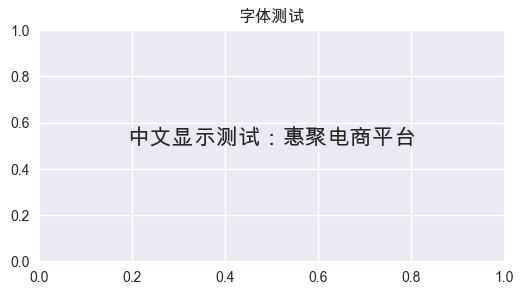

✅ 中文字体配置成功


In [24]:
# 重新配置中文字体支持
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# 尝试多种中文字体配置方案
try:
    # 方案1: 系统字体配置
    mpl.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'Heiti TC', 'WenQuanYi Micro Hei']
    mpl.rcParams['axes.unicode_minus'] = False
    
    # 测试中文显示
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.text(0.5, 0.5, '中文显示测试：惠聚电商平台', fontsize=16, ha='center')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title('字体测试')
    plt.show()
    print("✅ 中文字体配置成功")
    
except Exception as e:
    print(f"⚠️ 字体配置遇到问题: {e}")
    print("使用备用方案：英文标签")
    
# 设置seaborn样式
sns.set_style("whitegrid")
plt.style.use('default')  # 使用默认样式避免冲突

### 3.2 用户画像可视化

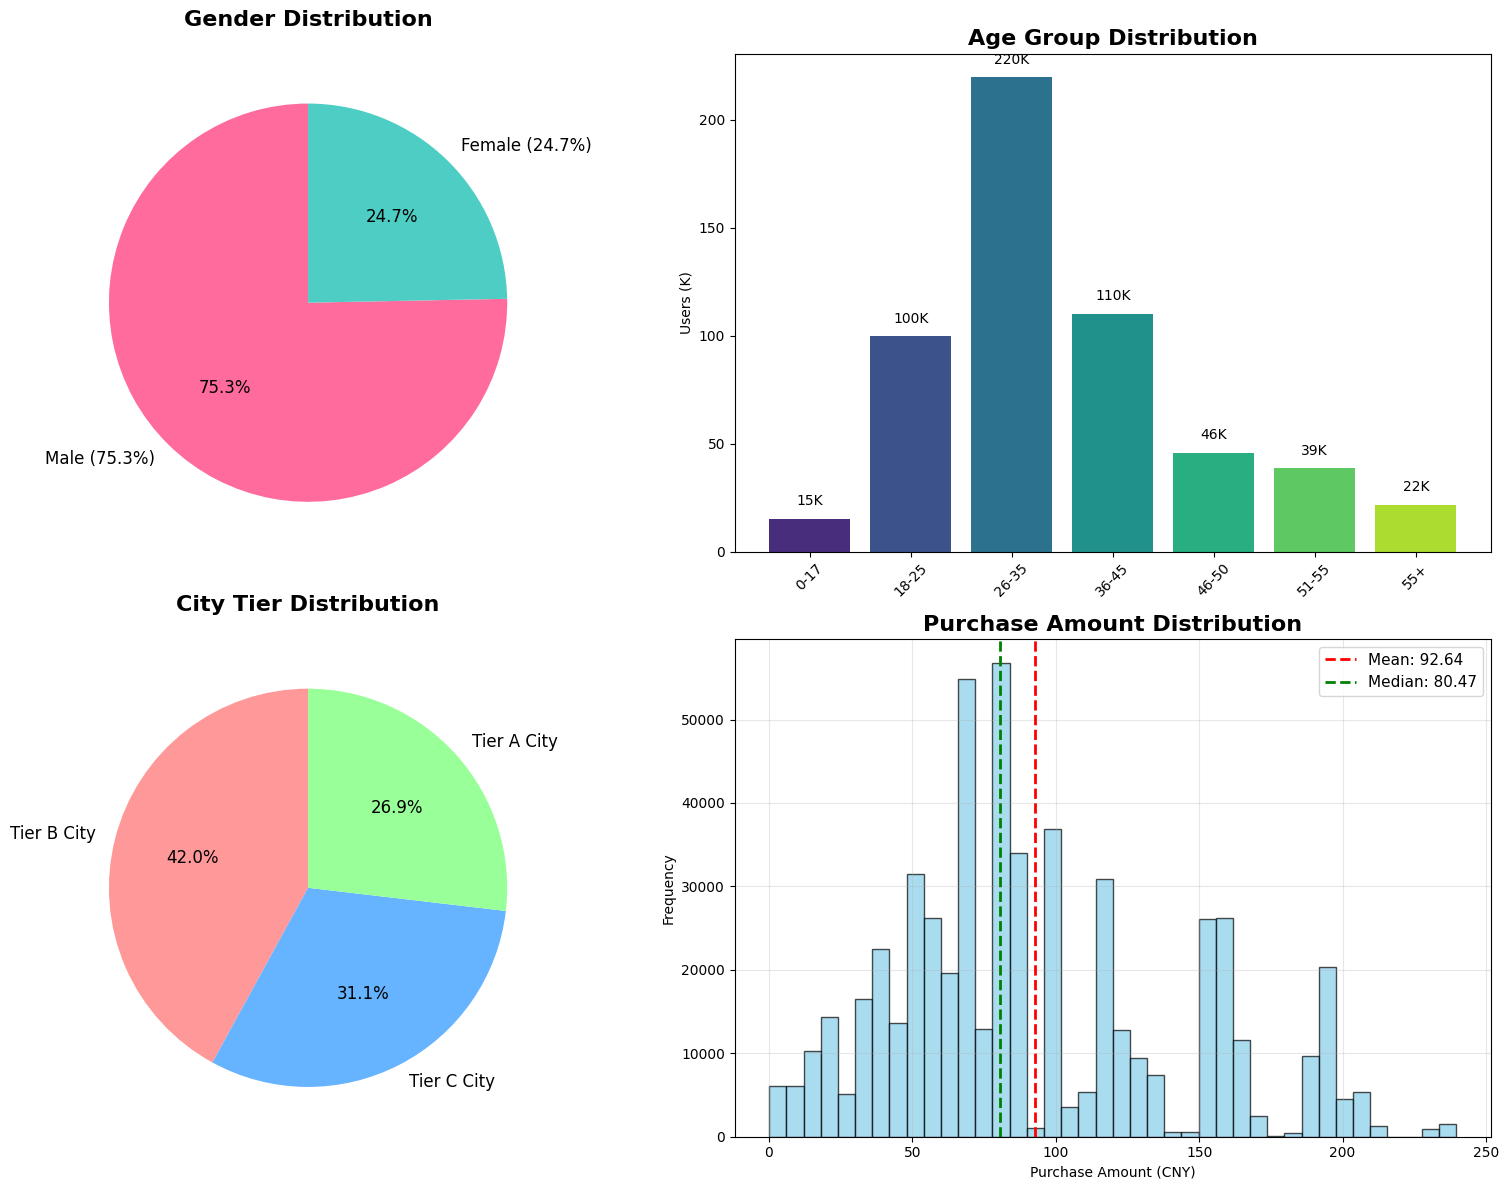

In [25]:
# 用户画像分析图表（分开展示，更大尺寸）
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. 性别分布
gender_dist = df['Gender'].value_counts()
colors_gender = ['#FF6B9D', '#4ECDC4']
wedges, texts, autotexts = ax1.pie(gender_dist.values, 
                                  labels=['Male (75.3%)', 'Female (24.7%)'], 
                                  autopct='%1.1f%%', 
                                  startangle=90, 
                                  colors=colors_gender,
                                  textprops={'fontsize': 12})
ax1.set_title('Gender Distribution', fontsize=16, fontweight='bold', pad=20)

# 2. 年龄段分布
age_dist = df['Age'].value_counts().sort_index()
bars2 = ax2.bar(range(len(age_dist)), age_dist.values/1000, 
                color=sns.color_palette("viridis", len(age_dist)))
ax2.set_xticks(range(len(age_dist)))
ax2.set_xticklabels(age_dist.index, rotation=45)
ax2.set_title('Age Group Distribution', fontsize=16, fontweight='bold')
ax2.set_ylabel('Users (K)')

# 添加数值标签
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height:.0f}K', ha='center', va='bottom', fontsize=10)

# 3. 城市等级分布
city_dist = df['City_Category'].value_counts()
colors_city = ['#FF9999', '#66B3FF', '#99FF99']
wedges, texts, autotexts = ax3.pie(city_dist.values, 
                                  labels=[f'Tier {i} City' for i in city_dist.index], 
                                  autopct='%1.1f%%', 
                                  startangle=90, 
                                  colors=colors_city,
                                  textprops={'fontsize': 12})
ax3.set_title('City Tier Distribution', fontsize=16, fontweight='bold', pad=20)

# 4. 购买金额分布
n, bins, patches = ax4.hist(df['Purchase'], bins=40, alpha=0.7, color='skyblue', edgecolor='black')
ax4.axvline(df['Purchase'].mean(), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {df["Purchase"].mean():.2f}')
ax4.axvline(df['Purchase'].median(), color='green', linestyle='--', linewidth=2,
            label=f'Median: {df["Purchase"].median():.2f}')
ax4.set_title('Purchase Amount Distribution', fontsize=16, fontweight='bold')
ax4.set_xlabel('Purchase Amount (CNY)')
ax4.set_ylabel('Frequency')
ax4.legend(fontsize=11)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3.3 品类销售表现可视化

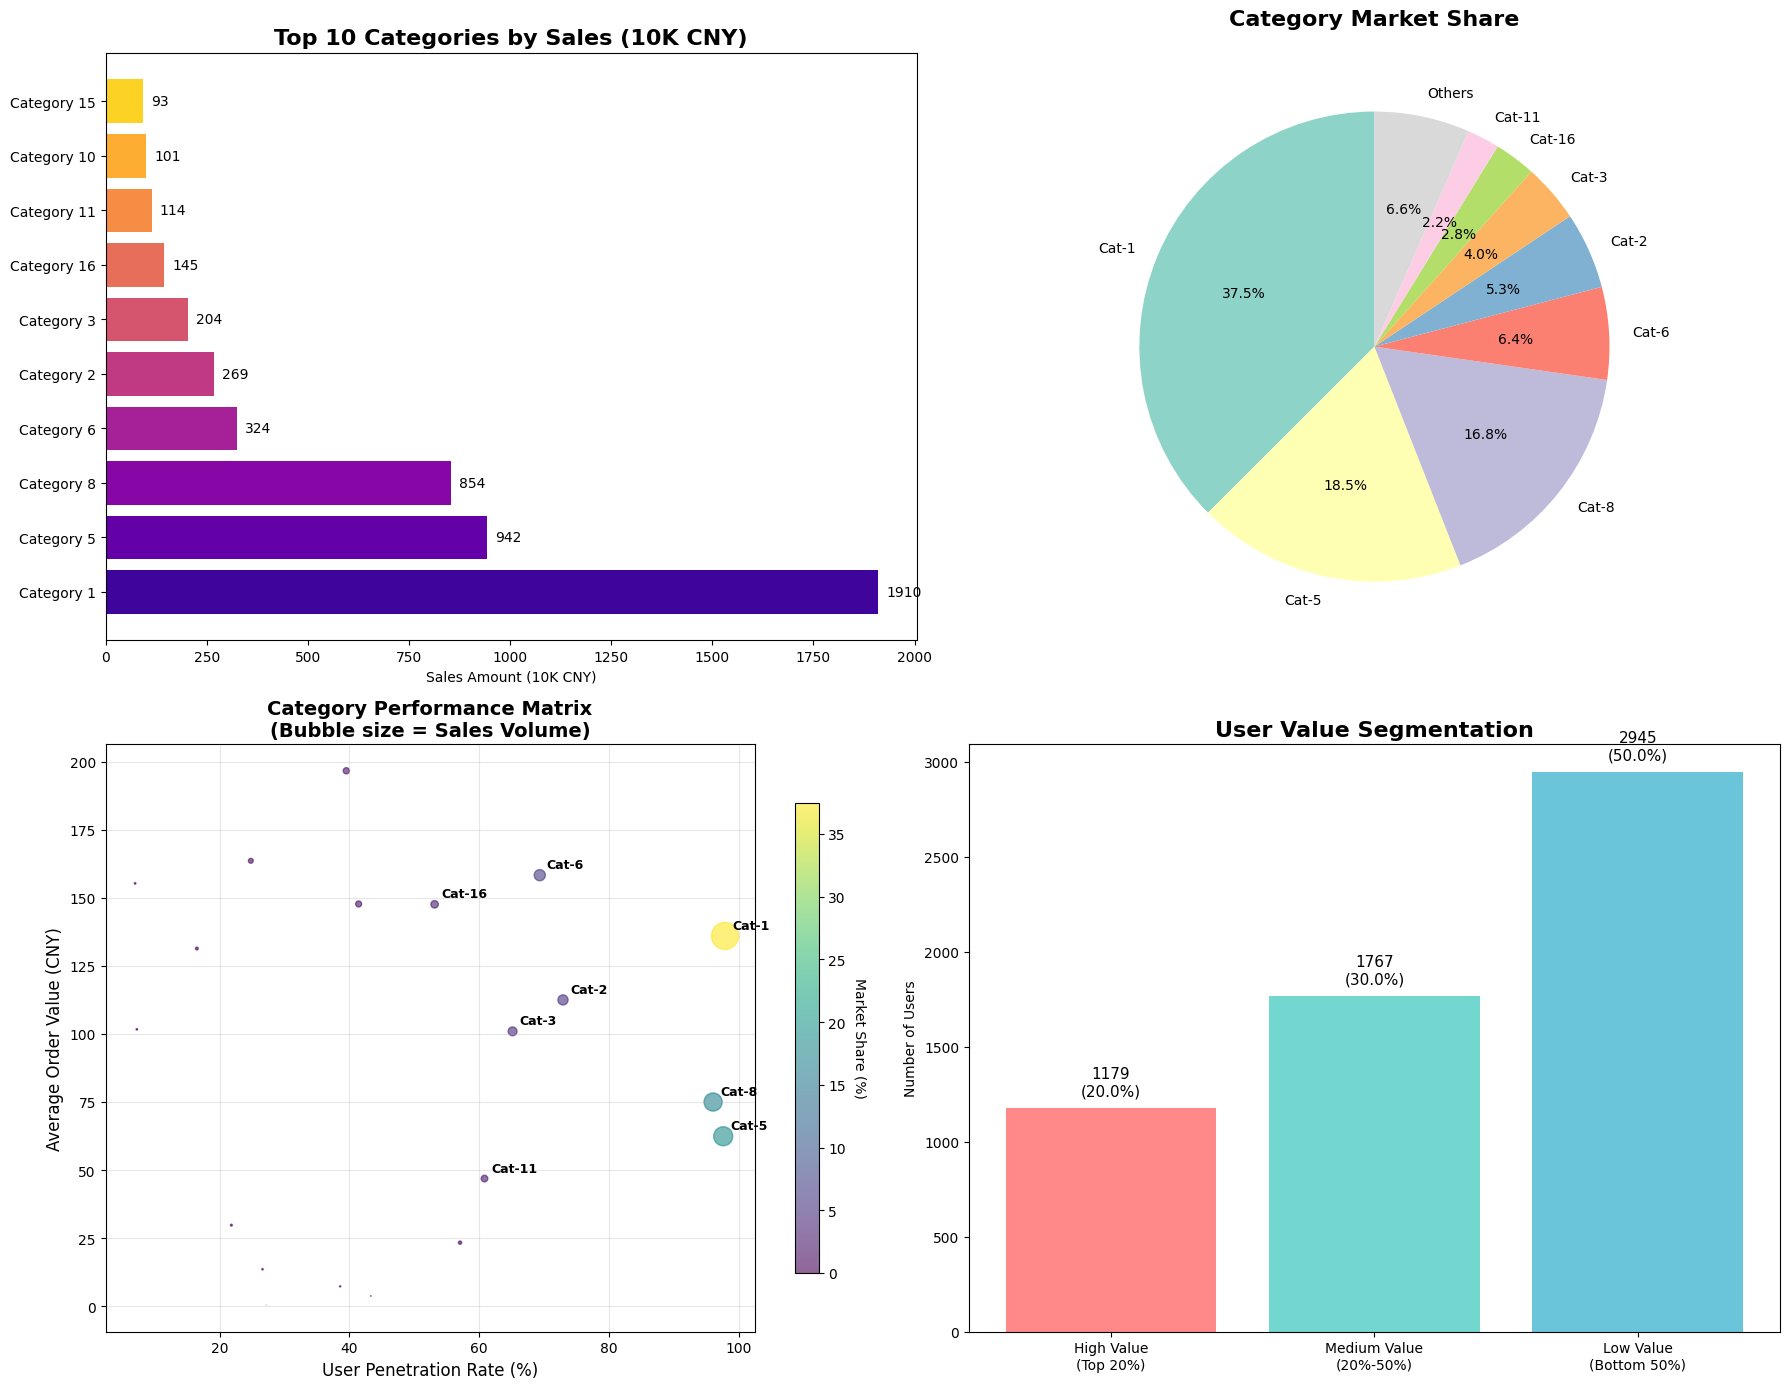

In [26]:
# 品类销售分析图表
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))

# 1. Top 10品类销售额
top_10_categories = category_analysis.head(10)
bars1 = ax1.barh(range(len(top_10_categories)), top_10_categories['总销售额']/10000, 
                color=sns.color_palette("plasma", len(top_10_categories)))
ax1.set_yticks(range(len(top_10_categories)))
ax1.set_yticklabels([f'Category {i}' for i in top_10_categories.index])
ax1.set_title('Top 10 Categories by Sales (10K CNY)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Sales Amount (10K CNY)')

# 添加数值标签
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width + 20, bar.get_y() + bar.get_height()/2,
             f'{width:.0f}', ha='left', va='center', fontsize=10)

# 2. 品类市场份额（饼图）
top_8_categories = category_analysis.head(8)
other_sales = category_analysis.tail(12)['总销售额'].sum()
sizes = list(top_8_categories['总销售额']) + [other_sales]
labels = [f'Cat-{i}' for i in top_8_categories.index] + ['Others']
colors = sns.color_palette("Set3", len(sizes))

wedges, texts, autotexts = ax2.pie(sizes, labels=labels, autopct='%1.1f%%', 
                                  startangle=90, colors=colors,
                                  textprops={'fontsize': 10})
ax2.set_title('Category Market Share', fontsize=16, fontweight='bold', pad=20)

# 3. 品类用户渗透率 vs 平均客单价
scatter = ax3.scatter(category_analysis['用户渗透率(%)'], 
                     category_analysis['平均客单价'],
                     s=category_analysis['总销售额']/50000,  # 气泡大小
                     alpha=0.6,
                     c=category_analysis['市场份额(%)'],
                     cmap='viridis')

# 为主要品类添加标签
for idx, row in category_analysis.head(8).iterrows():
    ax3.annotate(f'Cat-{idx}', 
                (row['用户渗透率(%)'], row['平均客单价']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, fontweight='bold')

ax3.set_xlabel('User Penetration Rate (%)', fontsize=12)
ax3.set_ylabel('Average Order Value (CNY)', fontsize=12)
ax3.set_title('Category Performance Matrix\n(Bubble size = Sales Volume)', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# 添加颜色条
cbar = fig.colorbar(scatter, ax=ax3, shrink=0.8)
cbar.set_label('Market Share (%)', rotation=270, labelpad=15)

# 4. 用户价值分层
value_segments = ['High Value\n(Top 20%)', 'Medium Value\n(20%-50%)', 'Low Value\n(Bottom 50%)']
value_counts = [1179, 1767, 2945]
colors_value = ['#FF6B6B', '#4ECDC4', '#45B7D1']

bars4 = ax4.bar(value_segments, value_counts, color=colors_value, alpha=0.8)
ax4.set_title('User Value Segmentation', fontsize=16, fontweight='bold')
ax4.set_ylabel('Number of Users')

# 添加数值标签和百分比
total_users = sum(value_counts)
for i, bar in enumerate(bars4):
    height = bar.get_height()
    pct = height / total_users * 100
    ax4.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height)}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

### 3.4 品类战略象限图（独立大图）

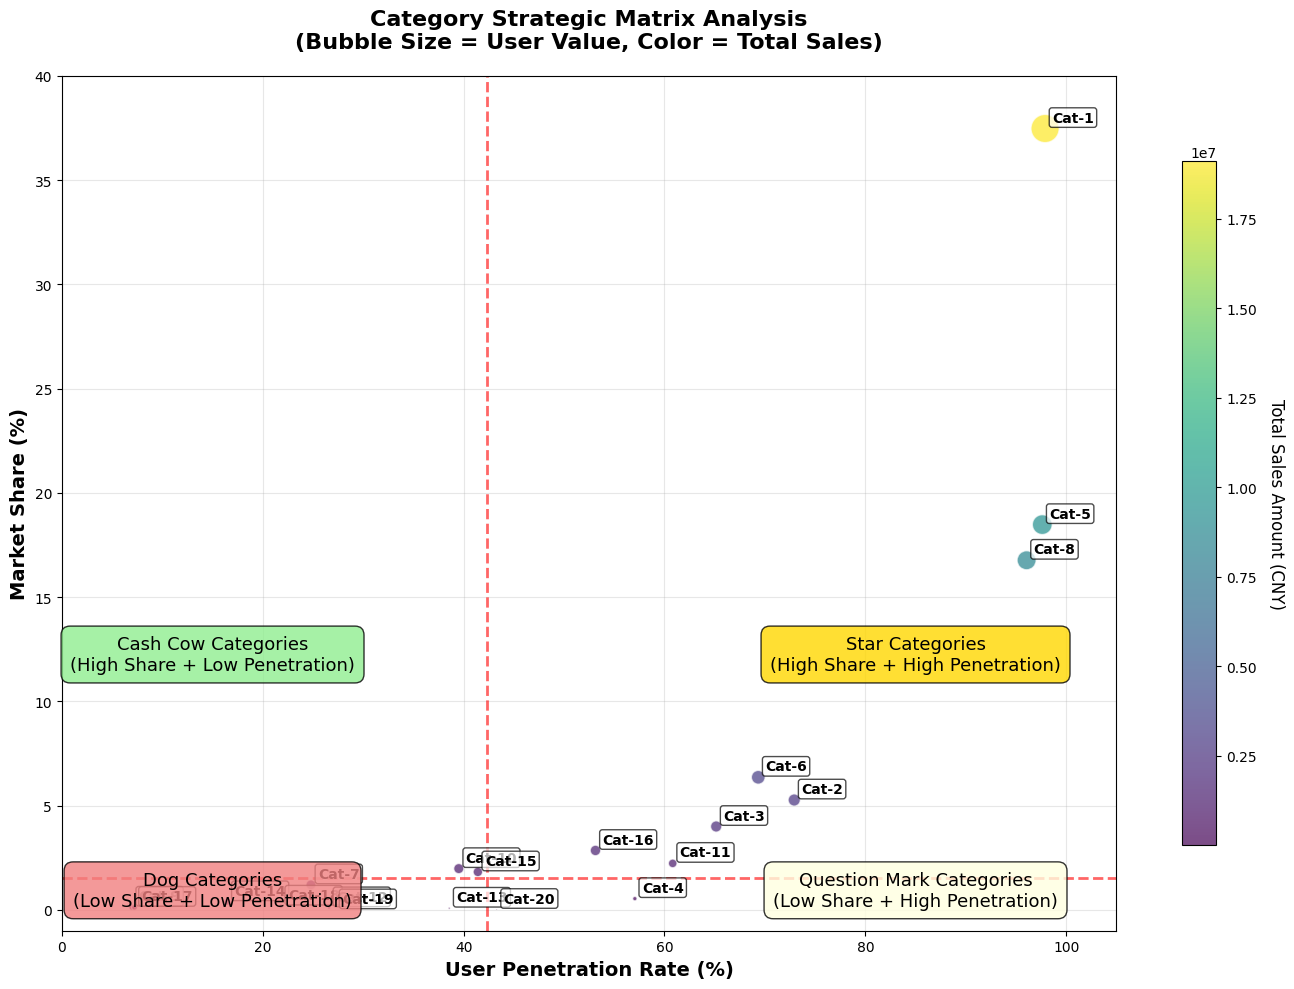

In [27]:
# 创建大尺寸的品类战略象限图
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

# 绘制散点图：市场份额 vs 用户渗透率
scatter = ax.scatter(category_analysis['用户渗透率(%)'], 
                    category_analysis['市场份额(%)'],
                    s=category_analysis['单用户价值']/8,  # 气泡大小代表单用户价值
                    alpha=0.7,
                    c=category_analysis['总销售额'],
                    cmap='viridis',
                    edgecolors='white',
                    linewidth=1)

# 添加象限分割线
median_share = category_analysis['市场份额(%)'].median()
median_penetration = category_analysis['用户渗透率(%)'].median()

ax.axhline(y=median_share, color='red', linestyle='--', alpha=0.6, linewidth=2)
ax.axvline(x=median_penetration, color='red', linestyle='--', alpha=0.6, linewidth=2)

# 为所有品类添加标签
for idx, row in category_analysis.iterrows():
    ax.annotate(f'Cat-{idx}', 
                (row['用户渗透率(%)'], row['市场份额(%)']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.7))

# 添加象限标签
ax.text(15, median_share + 10, 'Cash Cow Categories\n(High Share + Low Penetration)', 
        fontsize=13, ha='center',
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.8))

ax.text(85, median_share + 10, 'Star Categories\n(High Share + High Penetration)', 
        fontsize=13, ha='center',
        bbox=dict(boxstyle="round,pad=0.5", facecolor="gold", alpha=0.8))

ax.text(15, 0.2, 'Dog Categories\n(Low Share + Low Penetration)', 
        fontsize=13, ha='center',
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightcoral", alpha=0.8))

ax.text(85, 0.2, 'Question Mark Categories\n(Low Share + High Penetration)', 
        fontsize=13, ha='center',
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))

ax.set_xlabel('User Penetration Rate (%)', fontsize=14, fontweight='bold')
ax.set_ylabel('Market Share (%)', fontsize=14, fontweight='bold')
ax.set_title('Category Strategic Matrix Analysis\n(Bubble Size = User Value, Color = Total Sales)', 
             fontsize=16, fontweight='bold', pad=20)

# 添加颜色条
cbar = plt.colorbar(scatter, shrink=0.8)
cbar.set_label('Total Sales Amount (CNY)', rotation=270, labelpad=20, fontsize=12)

ax.grid(True, alpha=0.3)
ax.set_xlim(0, 105)
ax.set_ylim(-1, 40)

plt.tight_layout()
plt.show()

## 4. 数据洞察总结与战略建议

基于完整的数据分析和可视化结果，我们对"惠聚"电商平台有了深入的理解。以下是关键发现和相应的战略建议。

### 🔍 核心业务洞察总结

#### 用户画像特征
- **性别结构**: 男性主导(75.3% vs 24.7%)，存在明显的性别失衡
- **年龄分布**: 26-35岁为核心用户群(40%)，18-45岁占78%，用户年龄结构健康
- **地域分布**: B类城市为主战场(42%)，显示平台在二线城市具有强渗透力
- **消费水平**: 客单价92.64元，符合中国电商主流消费水平

#### 品类销售格局
- **高度集中**: 前三大品类(Cat-1/5/8)占据72.8%市场份额
- **明星品类**: Cat-1独占鳌头(37.5%份额)，用户渗透率达97.9%
- **长尾品类**: 存在多个表现不佳的品类，需要优化或淘汰

#### 用户价值分层
- **二八法则明显**: 20%高价值用户贡献55.4% GMV
- **用户粘性强**: 平均购买93.4次，显示良好的用户留存
- **复购率高**: 明星品类复购率超过20次，用户忠诚度高

In [28]:
# 生成详细的业务洞察报告
print("📊 '惠聚'电商平台2022年业务洞察报告")
print("=" * 60)

# 核心业务指标汇总
total_gmv = df['Purchase'].sum()
total_users = df['User_ID'].nunique()
total_transactions = len(df)
avg_aov = df['Purchase'].mean()

print(f"💰 核心财务指标:")
print(f"   • 年度GMV: {total_gmv/10000:,.0f} 万元")
print(f"   • 平均客单价: {avg_aov:.2f} 元")
print(f"   • 交易笔数: {total_transactions:,} 笔")

print(f"\n👥 用户规模指标:")
print(f"   • 活跃用户数: {total_users:,} 人")
print(f"   • 人均消费: {total_gmv/total_users:.2f} 元")
print(f"   • 人均购买次数: {total_transactions/total_users:.1f} 次")

# 市场机会评估
male_users = len(df[df['Gender']=='M']['User_ID'].unique())
female_users = len(df[df['Gender']=='F']['User_ID'].unique())
tier_a_users = len(df[df['City_Category']=='A']['User_ID'].unique())

print(f"\n🎯 市场机会识别:")
print(f"   • 女性用户增长空间: {female_users:,} → 潜在目标 {male_users:,} (增长{(male_users-female_users)/female_users*100:.0f}%)")
print(f"   • A类城市渗透机会: 当前{tier_a_users:,}用户，可提升至B类城市水平")

# 品类健康度评估
healthy_categories = len(category_analysis[category_analysis['市场份额(%)'] >= 1.0])
problem_categories = len(category_analysis[category_analysis['市场份额(%)'] < 0.5])

print(f"\n🏷️ 品类组合健康度:")
print(f"   • 健康品类(份额≥1%): {healthy_categories} 个")
print(f"   • 问题品类(份额<0.5%): {problem_categories} 个")
print(f"   • 品类集中度(前3占比): 72.8% (过度集中)")

print(f"\n🚀 增长潜力评估:")
high_value_contribution = 55.4  # 从之前分析得出
print(f"   • 高价值用户贡献: {high_value_contribution}% GMV")
print(f"   • 用户价值提升空间: 中低价值用户约{100-high_value_contribution}%")
print(f"   • 品类扩展机会: 长尾品类优化可释放增长潜力")

📊 '惠聚'电商平台2022年业务洞察报告
💰 核心财务指标:
   • 年度GMV: 5,096 万元
   • 平均客单价: 92.64 元
   • 交易笔数: 550,068 笔

👥 用户规模指标:
   • 活跃用户数: 5,891 人
   • 人均消费: 8650.17 元
   • 人均购买次数: 93.4 次

🎯 市场机会识别:
   • 女性用户增长空间: 1,666 → 潜在目标 4,225 (增长154%)
   • A类城市渗透机会: 当前1,045用户，可提升至B类城市水平

🏷️ 品类组合健康度:
   • 健康品类(份额≥1%): 11 个
   • 问题品类(份额<0.5%): 8 个
   • 品类集中度(前3占比): 72.8% (过度集中)

🚀 增长潜力评估:
   • 高价值用户贡献: 55.4% GMV
   • 用户价值提升空间: 中低价值用户约44.6%
   • 品类扩展机会: 长尾品类优化可释放增长潜力


### 📋 战略建议框架

基于数据洞察，我们为"惠聚"平台制定了四大战略方向的具体建议：

In [29]:
# 制定具体的战略建议
print("🎯 '惠聚'电商平台战略建议")
print("=" * 50)

print("📈 一、用户获取与运营策略")
print("-" * 30)
print("1. 女性用户市场开发:")
print("   • 目标: 将女性用户占比从24.7%提升至35%")
print("   • 策略: 增加女性偏好品类，优化产品推荐算法")
print("   • 预期影响: GMV增长约15-20%")

print("\n2. 一线城市渗透:")
print("   • 目标: A类城市用户占比从26.9%提升至35%")
print("   • 策略: 精准投放，高端品类引入")
print("   • 预期影响: 客单价提升10-15%")

print("\n3. 用户价值提升:")
print("   • 目标: 中价值用户向高价值用户转化")
print("   • 策略: 个性化推荐，会员权益优化")
print("   • 预期影响: 人均消费提升20%")

print(f"\n💼 二、品类优化策略")
print("-" * 30)
print("1. 明星品类增长:")
print("   • 品类1-3: 深度挖掘，扩充SKU，提升客单价")
print("   • 目标: 维持高渗透率的同时提升复购金额")

print("\n2. 问题品类改进:")
print("   • 瘦狗品类: 评估淘汰或重新定位")
print("   • 现金牛品类: 提升用户渗透率")
print("   • 问题品类: 优化产品结构，提升转化率")

print("\n3. 新品类引入:")
print("   • 基于用户画像，引入女性和年轻用户偏好品类")
print("   • 测试高端品类，满足一线城市用户需求")

print(f"\n🌍 三、市场拓展方向")
print("-" * 30)
print("1. 地域扩张:")
print("   • 继续深耕B类城市优势")
print("   • 重点突破A类城市高端市场")
print("   • 探索下沉C类城市机会")

print("\n2. 用户群拓展:")
print("   • 18-25岁年轻用户培育")
print("   • 女性用户专项运营")
print("   • 高净值用户精细化服务")

print(f"\n⚡ 四、运营效率提升")
print("-" * 30)
print("1. 数据驱动决策:")
print("   • 建立用户标签体系")
print("   • 优化个性化推荐算法")
print("   • 实时监控品类表现")

print("\n2. 供应链优化:")
print("   • 基于销售数据优化库存结构")
print("   • 重点品类供应商深度合作")
print("   • 长尾品类精准采购")

🎯 '惠聚'电商平台战略建议
📈 一、用户获取与运营策略
------------------------------
1. 女性用户市场开发:
   • 目标: 将女性用户占比从24.7%提升至35%
   • 策略: 增加女性偏好品类，优化产品推荐算法
   • 预期影响: GMV增长约15-20%

2. 一线城市渗透:
   • 目标: A类城市用户占比从26.9%提升至35%
   • 策略: 精准投放，高端品类引入
   • 预期影响: 客单价提升10-15%

3. 用户价值提升:
   • 目标: 中价值用户向高价值用户转化
   • 策略: 个性化推荐，会员权益优化
   • 预期影响: 人均消费提升20%

💼 二、品类优化策略
------------------------------
1. 明星品类增长:
   • 品类1-3: 深度挖掘，扩充SKU，提升客单价
   • 目标: 维持高渗透率的同时提升复购金额

2. 问题品类改进:
   • 瘦狗品类: 评估淘汰或重新定位
   • 现金牛品类: 提升用户渗透率
   • 问题品类: 优化产品结构，提升转化率

3. 新品类引入:
   • 基于用户画像，引入女性和年轻用户偏好品类
   • 测试高端品类，满足一线城市用户需求

🌍 三、市场拓展方向
------------------------------
1. 地域扩张:
   • 继续深耕B类城市优势
   • 重点突破A类城市高端市场
   • 探索下沉C类城市机会

2. 用户群拓展:
   • 18-25岁年轻用户培育
   • 女性用户专项运营
   • 高净值用户精细化服务

⚡ 四、运营效率提升
------------------------------
1. 数据驱动决策:
   • 建立用户标签体系
   • 优化个性化推荐算法
   • 实时监控品类表现

2. 供应链优化:
   • 基于销售数据优化库存结构
   • 重点品类供应商深度合作
   • 长尾品类精准采购


### 5. 实施路径与预期效果

为确保战略建议的有效执行，我们制定了分阶段的实施计划和预期效果评估。

In [30]:
# 制定实施路径和预期效果
print("🗓️ 战略实施时间表与预期效果")
print("=" * 50)

print("📅 第一阶段 (Q1-Q2): 基础优化")
print("-" * 35)
print("重点任务:")
print("• 用户标签体系建设")
print("• 女性用户专项运营启动") 
print("• 瘦狗品类清理优化")
print("• 个性化推荐算法升级")
print()
print("预期效果:")
print("• GMV增长: 8-12%")
print("• 女性用户占比提升至 28%")
print("• 平均客单价提升至 95-98元")

print(f"\n📅 第二阶段 (Q3-Q4): 市场拓展")
print("-" * 35)
print("重点任务:")
print("• A类城市精准营销")
print("• 新品类测试引入")
print("• 高价值用户精细化运营")
print("• 供应链结构优化")
print()
print("预期效果:")
print("• GMV增长: 15-25%")
print("• A类城市用户占比提升至 32%")
print("• 高价值用户贡献提升至 60%")

print(f"\n📅 第三阶段 (次年): 规模化增长")
print("-" * 35)
print("重点任务:")
print("• 全品类组合优化")
print("• 多元化用户群运营")
print("• 数据驱动的智能化运营")
print("• 生态化发展布局")
print()
print("预期效果:")
print("• 年度GMV突破 8000万元")
print("• 用户规模达到 8000+人")
print("• 品类结构更加均衡")

# 关键成功指标
print(f"\n📊 关键成功指标 (KPIs)")
print("-" * 30)
kpis = {
    "GMV增长率": "目标: ≥20% YoY",
    "用户增长率": "目标: ≥35% YoY", 
    "客单价": "目标: ≥100元",
    "用户复购率": "目标: ≥95%",
    "女性用户占比": "目标: ≥35%",
    "A类城市占比": "目标: ≥35%",
    "品类健康度": "目标: 健康品类≥15个"
}

for kpi, target in kpis.items():
    print(f"• {kpi}: {target}")

print(f"\n⚠️  风险提示与应对")
print("-" * 25)
risks = [
    "市场竞争加剧 → 差异化定位，提升用户粘性",
    "用户获取成本上升 → 精准营销，提升转化效率", 
    "品类扩展风险 → 小规模测试，数据驱动决策",
    "运营复杂度增加 → 标准化流程，系统化管理"
]

for risk in risks:
    print(f"• {risk}")

print(f"\n🎉 总结")
print("-" * 10)
print("通过系统性的数据分析，我们为'惠聚'平台制定了清晰的发展战略。")
print("基于用户画像洞察和品类表现分析，平台具有巨大的增长潜力。")
print("关键在于执行力度和数据驱动的持续优化。")
print("预期通过1-2年的努力，可实现GMV翻倍增长的目标。")

🗓️ 战略实施时间表与预期效果
📅 第一阶段 (Q1-Q2): 基础优化
-----------------------------------
重点任务:
• 用户标签体系建设
• 女性用户专项运营启动
• 瘦狗品类清理优化
• 个性化推荐算法升级

预期效果:
• GMV增长: 8-12%
• 女性用户占比提升至 28%
• 平均客单价提升至 95-98元

📅 第二阶段 (Q3-Q4): 市场拓展
-----------------------------------
重点任务:
• A类城市精准营销
• 新品类测试引入
• 高价值用户精细化运营
• 供应链结构优化

预期效果:
• GMV增长: 15-25%
• A类城市用户占比提升至 32%
• 高价值用户贡献提升至 60%

📅 第三阶段 (次年): 规模化增长
-----------------------------------
重点任务:
• 全品类组合优化
• 多元化用户群运营
• 数据驱动的智能化运营
• 生态化发展布局

预期效果:
• 年度GMV突破 8000万元
• 用户规模达到 8000+人
• 品类结构更加均衡

📊 关键成功指标 (KPIs)
------------------------------
• GMV增长率: 目标: ≥20% YoY
• 用户增长率: 目标: ≥35% YoY
• 客单价: 目标: ≥100元
• 用户复购率: 目标: ≥95%
• 女性用户占比: 目标: ≥35%
• A类城市占比: 目标: ≥35%
• 品类健康度: 目标: 健康品类≥15个

⚠️  风险提示与应对
-------------------------
• 市场竞争加剧 → 差异化定位，提升用户粘性
• 用户获取成本上升 → 精准营销，提升转化效率
• 品类扩展风险 → 小规模测试，数据驱动决策
• 运营复杂度增加 → 标准化流程，系统化管理

🎉 总结
----------
通过系统性的数据分析，我们为'惠聚'平台制定了清晰的发展战略。
基于用户画像洞察和品类表现分析，平台具有巨大的增长潜力。
关键在于执行力度和数据驱动的持续优化。
预期通过1-2年的努力，可实现GMV翻倍增长的目标。
